# Análise exploratória de dados

In [300]:
# Importando as dependências
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [301]:
# Carregando os dados brutos
base_cadastral = pd.read_csv("../data/raw/base_cadastral.csv",  sep=";")
base_info = pd.read_csv("../data/raw/base_info.csv", sep=";")
base_pagamentos_desenvolvimento = pd.read_csv("../data/raw/base_pagamentos_desenvolvimento.csv", sep=";")
base_pagamentos_teste = pd.read_csv("../data/raw/base_pagamentos_teste.csv", sep=";")

### Visualizando os dados e entendendo os dados

In [302]:
base_cadastral

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62
...,...,...,...,...,...,...,...,...
1310,3431426889924624821,2020-08-13,92,NaN,Serviços,HOTMAIL,MEDIO,69
1311,5288503299611498087,2020-11-03,NaN,NaN,Comércio,YAHOO,PEQUENO,13
1312,957773253650890560,2021-07-05,NaN,NaN,Comércio,GMAIL,MEDIO,20
1313,6094038865287329652,2021-07-05,NaN,NaN,Serviços,GMAIL,GRANDE,48


In [303]:
base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.0,NaN
1,8274986328479596038,2018-09,106430.0,141.0
2,345447888460137901,2018-09,707439.0,99.0
3,1003144834589372198,2018-09,239659.0,96.0
4,324916756972236008,2018-09,203123.0,103.0
...,...,...,...,...
24396,705648002974742140,2021-12,278663.0,105.0
24397,4993499380140734678,2021-12,156968.0,140.0
24398,4614484019183480654,2021-12,292698.0,121.0
24399,1299146298565441811,2021-12,106180.0,121.0


In [304]:
base_pagamentos_desenvolvimento

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99
...,...,...,...,...,...,...,...
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99
77410,5220206408301580591,2021-06,2021-06-30,2021-08-16,2021-08-16,42239.00,5.99
77411,5860276371789140450,2021-06,2021-06-30,2021-07-16,2021-07-16,20921.50,5.99
77412,2814790209436551216,2021-06,2021-06-30,2021-07-16,2021-07-16,90231.05,6.99


In [305]:
base_pagamentos_teste

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99
...,...,...,...,...,...,...
12270,705648002974742140,2021-11,2021-11-25,2021-12-13,47010.00,6.99
12271,4993499380140734678,2021-11,2021-11-25,2021-12-13,122875.35,8.99
12272,4614484019183480654,2021-11,2021-11-26,2028-09-30,302200.00,5.99
12273,1299146298565441811,2021-11,2021-11-26,2021-12-13,143791.85,5.99


### Exploração inicial das bases individualmente

In [306]:
# Funções auxiliares 

# Aplica uma análise básica e geral a uma base de dados
def faz_analise_basica(df, nome):
    resumo = {
        "nome": nome,
        "shape": df.shape,
        "tipos_de_dados": df.dtypes.to_dict(),
        "valores_nulos": df.isnull().sum().to_dict(),
        "valores_unicos": df.nunique().to_dict(),
        "exemplo_valores": df.head(3).to_dict(orient="records"),
        "descricao": df.describe(include="all").to_dict(),
    }
    return resumo


# Imprime gráficos e tabelas para a análise básica
def plot_analises(analise):
    
    nome = analise['nome']
    print(f"\nAnalisando: {nome}")

    # Informações das dimensões da base de dados
    print(f"Dimensões: {analise['shape']}")
        
    # Converter dicionários em DataFrames para visualização
    df_nulos = pd.DataFrame.from_dict(analise['valores_nulos'], orient='index', columns=['valores_nulos'])
    df_unicos = pd.DataFrame.from_dict(analise['valores_unicos'], orient='index', columns=['valores_unicos'])
    df_dtypes = pd.DataFrame.from_dict({k: str(v) for k, v in analise['tipos_de_dados'].items()}, orient='index', columns=['tipo_de_dado'])

    # Juntar em um único DataFrame para exibir em tabela (se quiser)
    df_info = df_dtypes.join([df_nulos, df_unicos])

    # Gráfico de valores nulos
    plt.figure(figsize=(10, 4))
    df_nulos.sort_values('valores_nulos', ascending=False).plot(kind='bar', legend=False, color='salmon')
    plt.title(f'{nome}: Valores Nulos por Coluna')
    plt.ylabel('Qtd de valores nulos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Gráfico de valores únicos
    plt.figure(figsize=(10, 4))
    df_unicos.sort_values('valores_unicos', ascending=False).plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'{nome}: Valores Únicos por Coluna')
    plt.ylabel('Qtd de valores únicos')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Tabela com tipos de dados, nulos e únicos
    print(f'\n Informações de tipo, valores únicos e valores nulos: \n')
    display(df_info)
    
    # Imprimir descrição mais ciompleta sobre cada atributo
    print(f'\n Descrição completa sobre todas as colunas \n')
    df_descricao = pd.DataFrame(analise['descricao'])
    display(df_descricao)


#### Análise base_cadastral:

- **ID_CLIENTE**: Identificador único do cliente.  
- **DATA_CADASTRO**: Data da realização do cadastro no sistema. 
- **DDD**: Número do DDD do telefone do cliente.  
- **FLAG_PF**: Indica se o cliente é uma pessoa física (‘X’) ou jurídica (‘NaN’). 
- **SEGMENTO_INDUSTRIAL**: Indica a qual segmento da indústria pertence o 
cliente.  
- **DOMINIO_EMAIL**: Indica o domínio(ou provedor) do email utilizado para o 
cadastro.  
- **PORTE**: Indica o porte (tamanho) da empresa.  
- **CEP_2_DIG**: Indica os dois primeiros números do CEP do endereço 
cadastrado. 


Analisando: base_cadastral
Dimensões: (1315, 8)


<Figure size 1000x400 with 0 Axes>

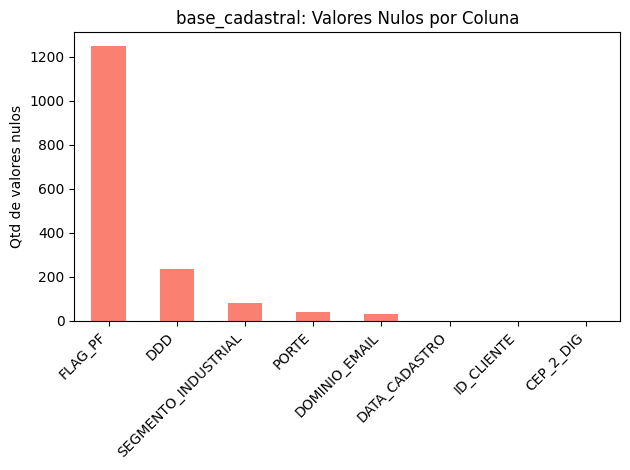

<Figure size 1000x400 with 0 Axes>

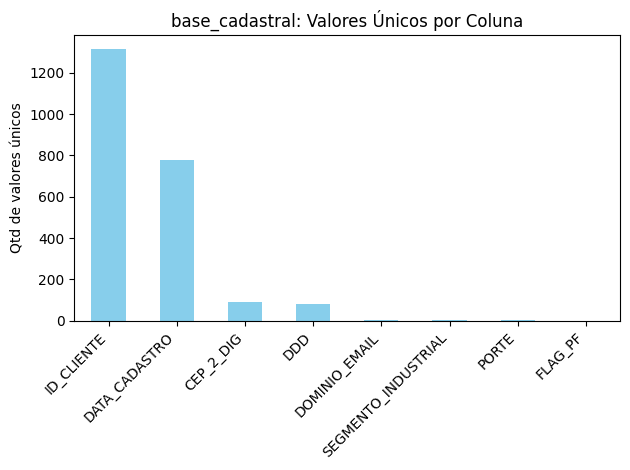


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1315
DATA_CADASTRO,object,0,777
DDD,object,237,79
FLAG_PF,object,1249,1
SEGMENTO_INDUSTRIAL,object,83,3
DOMINIO_EMAIL,object,30,6
PORTE,object,41,3
CEP_2_DIG,object,0,90



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
count,1.315000e+03,1315,1078,66,1232,1285,1274,1315
unique,NaN,777,79,1,3,6,3,90
top,NaN,2000-08-15,11,X,Serviços,YAHOO,MEDIO,13
freq,NaN,162,125,66,503,392,522,86
mean,4.637945e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.667894e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,8.784237e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.307709e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.714188e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.973809e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [307]:
analise_basica_base_cadastral = faz_analise_basica(base_cadastral, "base_cadastral")
plot_analises(analise_basica_base_cadastral)

##### Analises específicas de base_cadastral

Verificando a quantidade de elementos em cada categoria de porte

<Axes: >

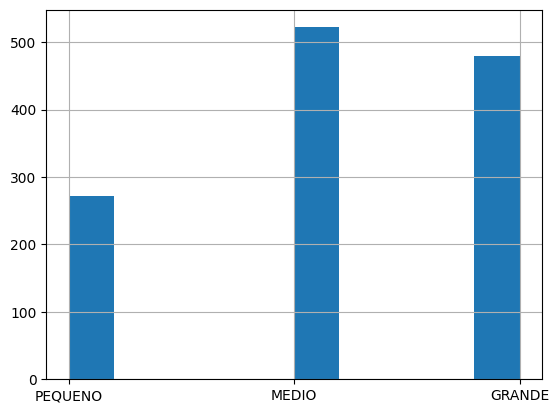

In [308]:
base_cadastral['PORTE'].hist()

Tratamento para melhore categorizar quem é pessoa física e quem é pessoa jurídica, em que 1 = Pessoa Física e 0 = Pessoa Jurídica

In [309]:
base_cadastral['FLAG_PF'] = np.where(base_cadastral['FLAG_PF']=='X', 1, 0)

n_zeros = (base_cadastral['FLAG_PF'] == 0).sum()
n_uns   = (base_cadastral['FLAG_PF'] == 1).sum()

n_zeros, n_uns

(np.int64(1249), np.int64(66))

**DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante. **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região postal e geralmente coincide com a área de abrangência de um **DDD**.

In [310]:
base_cadastral = base_cadastral.drop('DDD', axis=1)

Verificando se há email de domínio coorporativo. Pode haver uma relação 
entre domínio coorporativo e adimplência. Mas todos esses domínios são públicos


In [311]:
base_cadastral['DOMINIO_EMAIL'].value_counts()

DOMINIO_EMAIL
YAHOO      392
GMAIL      390
HOTMAIL    323
AOL         74
OUTLOOK     72
BOL         34
Name: count, dtype: int64

 Considerando que **DOMINIO_EMAIL** não tem influência sobre a variável target já que todos os domínios de e-mail analisados são públicos. Talvez poderia haver uma relação entre domínio de e-mail coorporativo vs público e a variável target. Mas nenhuma categoria de domínio e-mail é corporativa. 

In [312]:
base_cadastral = base_cadastral.drop('DOMINIO_EMAIL', axis=1)

In [313]:
base_cadastral.dtypes

ID_CLIENTE              int64
DATA_CADASTRO          object
FLAG_PF                 int64
SEGMENTO_INDUSTRIAL    object
PORTE                  object
CEP_2_DIG              object
dtype: object

Convertendo **DATA_CADASTRO** para o tipo mais adequado

In [314]:
base_cadastral['DATA_CADASTRO'] = pd.to_datetime(base_cadastral['DATA_CADASTRO'])

As colunas **SEGMENTO_INDUSTRIAL** e **PORTE** têm valores faltantes. Quando a base de dados for mesclada, será analisada a eliminação das linhas em que esses valores estiverem ausentes. Para eliminar esses registros pretende-se que os valores nulos não ultrapassem 5% do total de registros. Abaixo a quantidade de nulos para essa base específica

In [315]:
print(
    f"Quantidade valores nulos para a coluna SEGMENTO_INDUSTRIAL e PORTE, respectivamente: {base_cadastral['SEGMENTO_INDUSTRIAL'].isnull().sum()} e {base_cadastral['PORTE'].isnull().sum()}"
)

Quantidade valores nulos para a coluna SEGMENTO_INDUSTRIAL e PORTE, respectivamente: 83 e 41


##### Resumo análise individual base_cadastral:

- Muitos registros vazios em **FLAG_PF**. Esses registros vazios indicam os clientes pessoa jurídica. Realizado o tratamento para melhore categorizar quem é pessoa física e quem é pessoa jurídica.
- **DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante. **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região posta e geralmente coincide com a área de abrangência de um **DDD**.
- **DOMINIO_EMAIL** pode não ter influência sobre a variável target já que todos os domínios de e-mail analisados são públicos. Talvez poderia haver uma relação entre domínio de e-mail coorporativo vs público e a variável target. Mas nenhuma categoria de domínio email é corporativa.
- **CEP_2_DIG** pode influenciar na inadimplência. É uma variável geográfica e condições socioecômicas variam bastante pelo Brasil e condições socieconômicas influenciam na inadimplência
- O tratamento dos valores nulos das seguintes colunas: **SEGMENTO_INDUSTRIAL** (moda), **PORTE** (moda) será analisado quando as tabelas estiverem mescladas.
- **ID_CLIENTE**: será usado para o merge das tabelas e depois será removido.

#### Análise base_info:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **RENDA_MES_ANTERIOR**: Renda ou faturamento declarado pelo cliente no 
fim do mês anterior 
- **NO_FUNCIONARIOS**: Número de funcionários reportado pelo cliente no 
fim do mês anterior


Analisando: base_cadastral
Dimensões: (24401, 4)


<Figure size 1000x400 with 0 Axes>

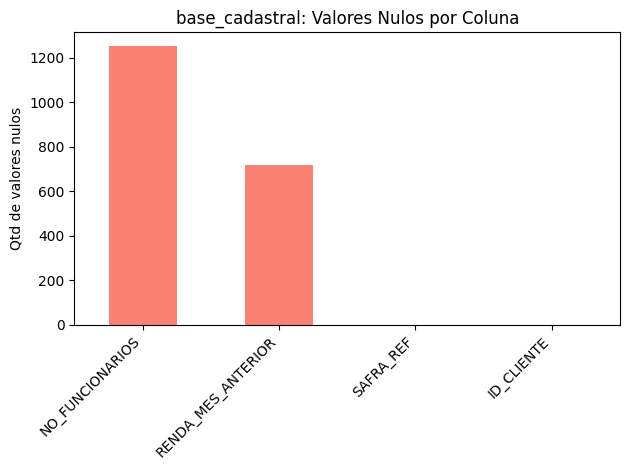

<Figure size 1000x400 with 0 Axes>

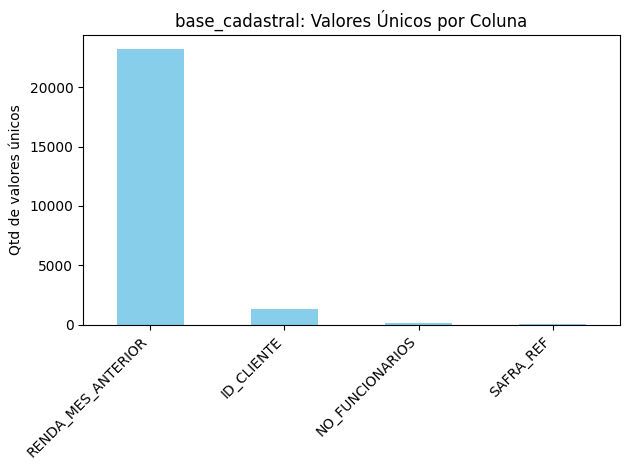


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1336
SAFRA_REF,object,0,40
RENDA_MES_ANTERIOR,float64,717,23196
NO_FUNCIONARIOS,float64,1252,128



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
count,2.440100e+04,24401,2.368400e+04,23149.000000
unique,NaN,40,NaN,NaN
top,NaN,2021-09,NaN,NaN
freq,NaN,717,NaN,NaN
mean,4.668214e+18,NaN,2.887514e+05,117.799646
std,2.669294e+18,NaN,2.115948e+05,21.464574
min,8.784237e+15,NaN,1.050000e+02,0.000000
25%,2.347029e+18,NaN,1.338662e+05,106.000000
50%,4.795153e+18,NaN,2.409985e+05,118.000000
75%,7.061869e+18,NaN,3.925018e+05,131.000000


In [316]:
analise_basica_base_info = faz_analise_basica(base_info, "base_cadastral")
plot_analises(analise_basica_base_info)

##### Análises específicas base_info:

Conversão de **SAFRA_REF** para datetime, agrupando por **ID_CLIENTE** e ordenando os agrupamentos pela safra

In [317]:
base_info['SAFRA_REF'] = pd.to_datetime(base_info['SAFRA_REF'], format='%Y-%m')

base_info = base_info.groupby('ID_CLIENTE').apply(
    lambda x: x.sort_values('SAFRA_REF')
).reset_index(drop=True)

base_info

C:\Users\Matheus\AppData\Local\Temp\ipykernel_15240\1675336263.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  base_info = base_info.groupby('ID_CLIENTE').apply(


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,8784237149961904,2018-09-01,300502.0,107.0
1,8784237149961904,2018-10-01,499238.0,98.0
2,8784237149961904,2018-11-01,256117.0,104.0
3,8784237149961904,2018-12-01,433897.0,105.0
4,8784237149961904,2019-01-01,370549.0,112.0
...,...,...,...,...
24396,9206030810342980458,2021-08-01,175291.0,101.0
24397,9206030810342980458,2021-09-01,535348.0,108.0
24398,9206030810342980458,2021-10-01,32400.0,101.0
24399,9206030810342980458,2021-11-01,856312.0,107.0


Verificando como tratar valores nulos em **RENDA_MES_ANTERIOR**. Percebe-se que esse dado tem característica temporal. Os valores anteriores e o posteriores podem ser utilizados para estimar o valor faltante. Analisando algumas amostrar para avaliar o uso da inteporlação linear para tratar os valores faltantes.

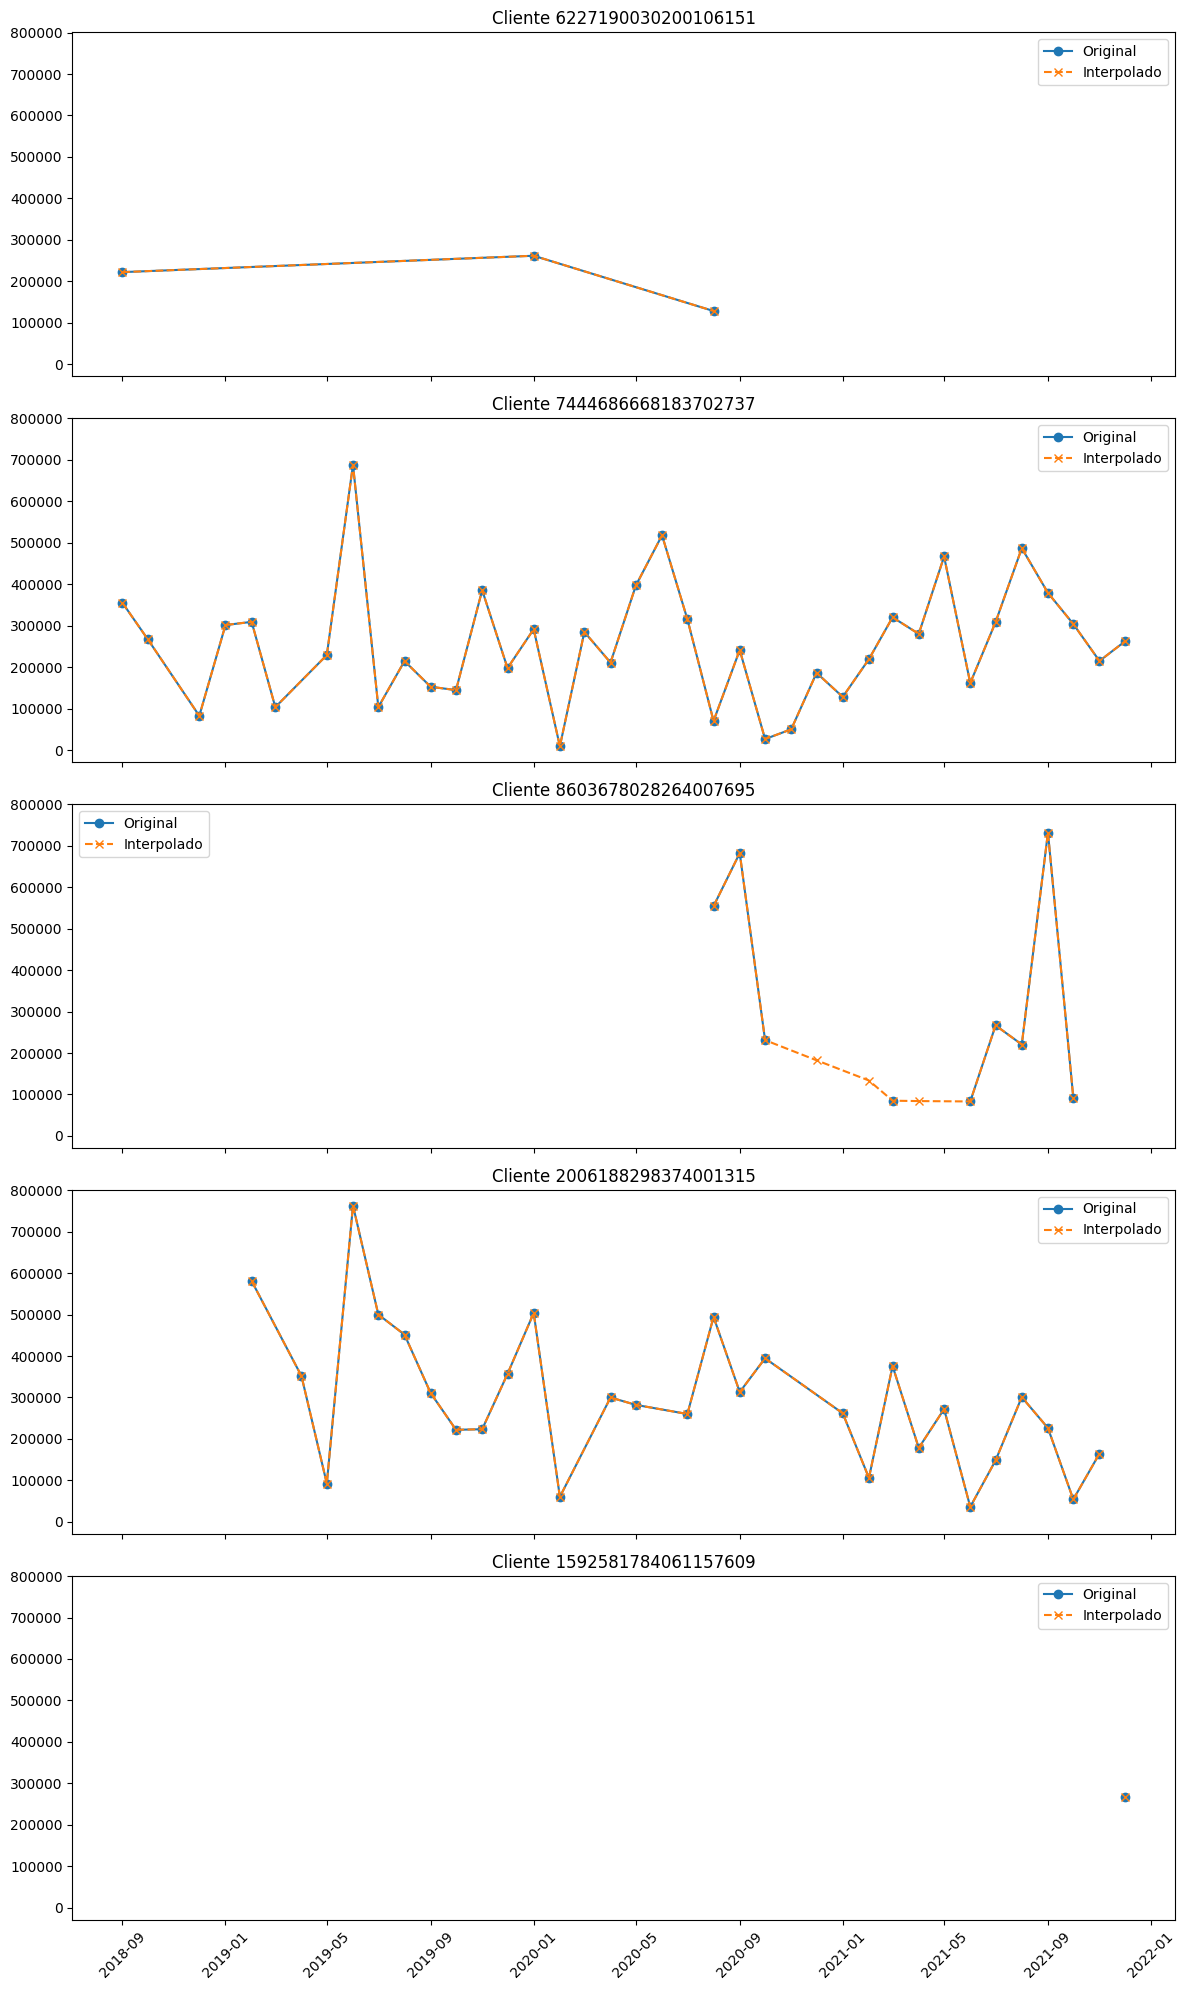

In [318]:
# Pega 5 clientes únicos aleatórios
N = 5
sample_clients = (
    base_info['ID_CLIENTE']
    .drop_duplicates()
    .sample(n=N, random_state=42)  # para reproduzir sempre os mesmos
    .tolist()
)

# Filtra só esses clientes
df_sample = base_info[base_info['ID_CLIENTE'].isin(sample_clients)]

# Cria um subplot para cada cliente
fig, axes = plt.subplots(N, 1, figsize=(12, 4*N), sharex=True, sharey=True)

for ax, cliente in zip(axes, sample_clients):
    dfc = df_sample[df_sample['ID_CLIENTE'] == cliente]
    # plot original
    ax.plot(dfc['SAFRA_REF'], 
            dfc['RENDA_MES_ANTERIOR'], 
            marker='o', 
            label='Original')
    # plot interpolado
    ax.plot(dfc['SAFRA_REF'], 
            dfc['RENDA_MES_ANTERIOR'].interpolate(), 
            marker='x', 
            linestyle='--', 
            label='Interpolado')
    
    ax.set_title(f'Cliente {cliente}')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

A linha laranja acompanha de perto os pontos azuis, o que indica que a interpolação linear conseguiu capturar a variação dos dados de forma coerente. Aplicando a interpolação linear para **RENDA_MES_ANTERIOR**

In [319]:
base_info['RENDA_MES_ANTERIOR'] = (
    base_info
    .groupby('ID_CLIENTE')['RENDA_MES_ANTERIOR']
    .transform(lambda x: x.interpolate(method='linear'))
)

Verificando vazios que ainda podem existir, esse método não funciona nas bordas 

In [320]:
base_info['RENDA_MES_ANTERIOR'].isnull().sum()

np.int64(35)

Aplicando o método backwark fill e forward fill para "as bordas" em que a interpolação linear não abrange 

In [321]:
base_info['RENDA_MES_ANTERIOR'] = (
    base_info
    .groupby('ID_CLIENTE')['NO_FUNCIONARIOS']
    .transform(lambda x: x.ffill().bfill())
)

Verificando vazios em **RENDA_MES_ANTERIOS**

In [322]:
base_info['RENDA_MES_ANTERIOR'].isnull().sum()

np.int64(11)

Como se pode ver pela análise a seguir, os casos restantes com valores faltantes acontece quando há 
um único registro para o cliente. Mais pra frente, a deleção desses valores vai ser avaliada 

In [323]:
base_info[base_info['RENDA_MES_ANTERIOR'].isnull()]

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
1942,789708718782735131,2020-09-01,NaN,NaN
3712,1311488706225587300,2021-10-01,NaN,NaN
4525,1658487213084590146,2021-09-01,NaN,NaN
4907,1825022747815271956,2020-05-01,NaN,NaN
5495,2044529419038430248,2021-04-01,NaN,NaN
15620,5883897347879529463,2021-03-01,NaN,NaN
16700,6335613629467537085,2021-11-01,NaN,NaN
17221,6597470754117210299,2021-06-01,NaN,NaN
17721,6826420906256954294,2021-11-01,NaN,NaN
21255,8079157452200263869,2021-11-01,NaN,NaN


In [324]:
base_info[base_info['ID_CLIENTE']==789708718782735131], base_info[base_info['ID_CLIENTE']==1311488706225587300]

(              ID_CLIENTE  SAFRA_REF  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS
 1942  789708718782735131 2020-09-01                 NaN              NaN,
                ID_CLIENTE  SAFRA_REF  RENDA_MES_ANTERIOR  NO_FUNCIONARIOS
 3712  1311488706225587300 2021-10-01                 NaN              NaN)

**N_FUNCIONARIOS** também possui muitos valores faltantes. Trata-se de valores discretos. Pode-se usar backwark fill e forward fill já que o número de funcionários não tendema se alterar tão abruptamente

In [325]:
base_info['NO_FUNCIONARIOS'] = (
    base_info
    .groupby('ID_CLIENTE')['NO_FUNCIONARIOS']
    .transform(lambda x: x.ffill().bfill())
)

Verificando se ainda há valores vazios em **NO_FUNCIONARIOS**

In [326]:
base_info['NO_FUNCIONARIOS'].isna().sum()

np.int64(11)

In [327]:
base_info

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,8784237149961904,2018-09-01,107.0,107.0
1,8784237149961904,2018-10-01,98.0,98.0
2,8784237149961904,2018-11-01,104.0,104.0
3,8784237149961904,2018-12-01,105.0,105.0
4,8784237149961904,2019-01-01,112.0,112.0
...,...,...,...,...
24396,9206030810342980458,2021-08-01,101.0,101.0
24397,9206030810342980458,2021-09-01,108.0,108.0
24398,9206030810342980458,2021-10-01,101.0,101.0
24399,9206030810342980458,2021-11-01,107.0,107.0


##### Resumo análise individual base_info:
- **SAFRA_REF**: conversão para datetime do pandas, agrupando registros por **ID_CLIENTE** e ordenando esses registros por **SAFRA_REF**.

- **RENDA_MES_ANTERIOR**: tratamento de vazios com interpolação linear pois trata-se de uma série temporaral, tentar estimar os valores a partir dos valores anteriores e posteriores é uma boa estratpegia neste caso

- **N_FUNCIONARIOS**: como o número de funcionários não tendem a se alterar abruptamente, o tratamento dos vazios foi por meio do backward e forward fill


#### Análise básica de base_pagamentos_desenvolvimento:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **DATA_EMISSAO_DOCUMENTO**: Data da emissão da nota de crédito 
- **DATA_VENCIMENTO**: Data limite para pagamento do empréstimo 
- **VALOR_A_PAGAR**: Valor da nota de crédito 
- **TAXA**: Taxa de juros cobrada no empréstimo 
- **DATA_PAGAMENTO**: Data em que o cliente realizou o pagamento da nota 


Analisando: base_cadastral
Dimensões: (77414, 7)


<Figure size 1000x400 with 0 Axes>

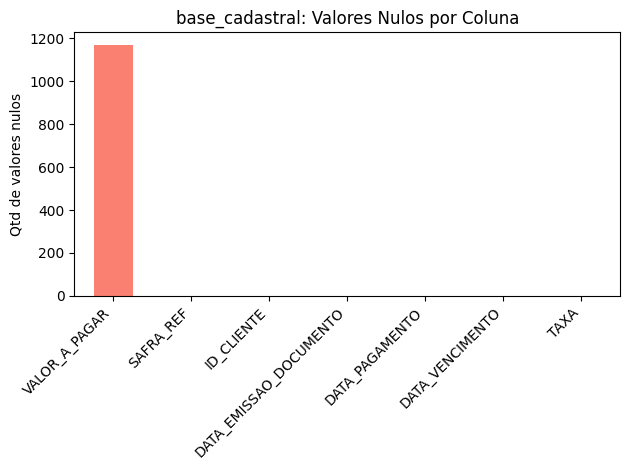

<Figure size 1000x400 with 0 Axes>

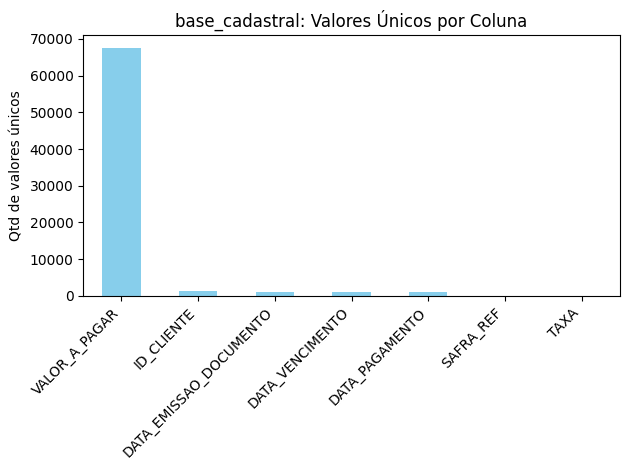


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,1248
SAFRA_REF,object,0,35
DATA_EMISSAO_DOCUMENTO,object,0,1040
DATA_PAGAMENTO,object,0,921
DATA_VENCIMENTO,object,0,955
VALOR_A_PAGAR,float64,1170,67588
TAXA,float64,0,5



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
count,7.741400e+04,77414,77414,77414,77414,7.624400e+04,77414.000000
unique,NaN,35,1040,921,955,NaN,NaN
top,NaN,2021-05,2021-05-16,2021-02-17,2019-03-06,NaN,NaN
freq,NaN,2531,207,315,357,NaN,NaN
mean,4.662270e+18,NaN,NaN,NaN,NaN,4.659078e+04,6.789623
std,2.665719e+18,NaN,NaN,NaN,NaN,4.643393e+04,1.798225
min,8.784237e+15,NaN,NaN,NaN,NaN,1.000000e-01,4.990000
25%,2.369365e+18,NaN,NaN,NaN,NaN,1.876536e+04,5.990000
50%,4.817817e+18,NaN,NaN,NaN,NaN,3.475869e+04,5.990000
75%,6.969349e+18,NaN,NaN,NaN,NaN,6.093384e+04,6.990000


In [328]:
analise_basica_pagamentos_desenvolvimento = faz_analise_basica(base_pagamentos_desenvolvimento, "base_cadastral")
plot_analises(analise_basica_pagamentos_desenvolvimento)

Agrupando valores por cliente e ordenando por safra para investigar se seria possível substituir os faltantes de alguma forma 

In [329]:
base_pagamentos_desenvolvimento.sort_values(by=['ID_CLIENTE', 'SAFRA_REF'])


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
166,8784237149961904,2018-08,2018-08-17,2018-09-04,2018-09-04,100616.10,5.99
167,8784237149961904,2018-08,2018-08-22,2018-09-11,2018-09-11,89552.80,5.99
168,8784237149961904,2018-08,2018-08-23,2018-09-10,2018-09-10,94062.80,5.99
169,8784237149961904,2018-08,2018-08-23,2018-09-08,2018-09-10,102686.10,5.99
170,8784237149961904,2018-08,2018-08-24,2018-09-11,2018-09-11,51393.00,5.99
...,...,...,...,...,...,...,...
73665,9206030810342980458,2021-05,2021-05-16,2021-06-01,2021-06-01,107321.36,11.99
75223,9206030810342980458,2021-05,2021-05-23,2021-06-08,2021-06-08,38372.91,5.99
76404,9206030810342980458,2021-06,2021-06-16,2021-07-02,2021-07-02,43030.50,5.99
76405,9206030810342980458,2021-06,2021-06-18,2021-07-05,2021-07-05,107318.81,5.99


#### Análise básica de base_pagamentos_teste:

- **ID_CLIENTE**: Identificador único do cliente 
- **SAFRA_REF**: Mês de referência da amostra 
- **DATA_EMISSAO_DOCUMENTO**: Data da emissão da nota de crédito 
- **DATA_VENCIMENTO**: Data limite para pagamento do empréstimo 
- **VALOR_A_PAGAR**: Valor da nota de crédito 
- **TAXA**: Taxa de juros cobrada no empréstimo 


Analisando: base_pagamentos_teste
Dimensões: (12275, 6)


<Figure size 1000x400 with 0 Axes>

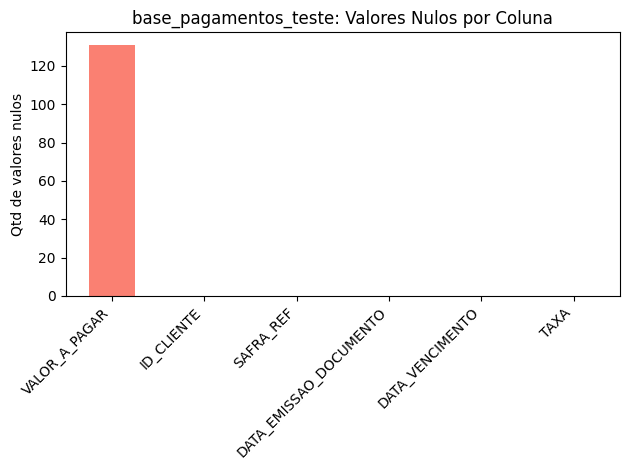

<Figure size 1000x400 with 0 Axes>

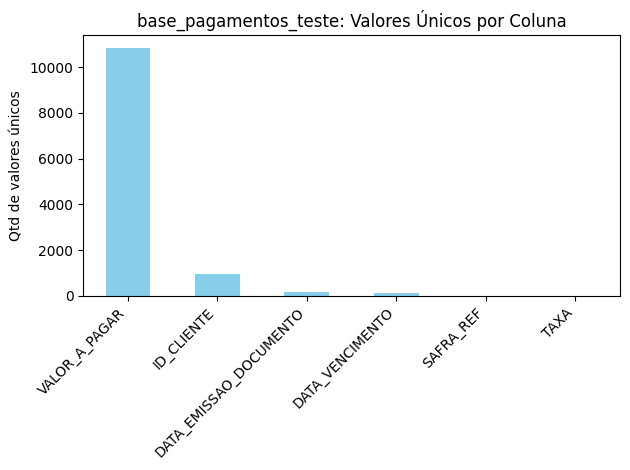


 Informações de tipo, valores únicos e valores nulos: 



,tipo_de_dado,valores_nulos,valores_unicos
ID_CLIENTE,int64,0,976
SAFRA_REF,object,0,5
DATA_EMISSAO_DOCUMENTO,object,0,150
DATA_VENCIMENTO,object,0,141
VALOR_A_PAGAR,float64,131,10850
TAXA,float64,0,5



 Descrição completa sobre todas as colunas 



,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
count,1.227500e+04,12275,12275,12275,12144.000000,12275.000000
unique,NaN,5,150,141,NaN,NaN
top,NaN,2021-10,2021-11-04,2021-09-06,NaN,NaN
freq,NaN,2673,177,293,NaN,NaN
mean,4.670820e+18,NaN,NaN,NaN,65883.258575,6.807271
std,2.667868e+18,NaN,NaN,NaN,55919.404970,1.835351
min,8.784237e+15,NaN,NaN,NaN,6.900000,4.990000
25%,2.308217e+18,NaN,NaN,NaN,26712.335000,5.990000
50%,4.850936e+18,NaN,NaN,NaN,49665.210000,5.990000
75%,6.964109e+18,NaN,NaN,NaN,87029.362500,6.990000


In [330]:
analise_basica_base_pagamentos_tesete = faz_analise_basica(base_pagamentos_teste, "base_pagamentos_teste")
plot_analises(analise_basica_base_pagamentos_tesete)

### Exploração das bases conjuntamente

#### Análise base_pagamentos_desenvolvimento X base_pagamentos_teste:

Buscando por clientes que estão na base de dados de teste mas não estão na base de dados de desenvolvimento (dificuldade em estabelecer informações da base cadastral e info)

In [331]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_test = set(base_pagamentos_teste       ['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_teste = ids_test  - ids_dev

# IDs que estão em desenvolvimento, mas não em teste
ids_so_dev   = ids_dev   - ids_test

print(f"Em teste e não em dev: {len(ids_so_teste)} clientes")
print(f"Em dev e não em teste: {len(ids_so_dev)} clientes")
print(f"Total ids dev: {len(ids_dev)}")
print(f"Total ids test: {len(ids_test)}")


Em teste e não em dev: 88 clientes
Em dev e não em teste: 360 clientes
Total ids dev: 1248
Total ids test: 976


#### Análise base_pagamentos_desenvolvimento X base_cadastral:

In [332]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_cad = set(base_cadastral['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_dev = ids_dev  - ids_cad
print(f"Em dev e não em cadastral: {len(ids_so_dev)} clientes")

Em dev e não em cadastral: 0 clientes


#### Análise base_pagamentos_desenvolvimento X base_info:

In [333]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_info = set(base_info['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_dev = ids_dev  - ids_info
print(f"Em dev e não em info: {len(ids_so_dev)} clientes")

Em dev e não em info: 0 clientes


In [334]:
# Extrai os conjuntos de IDs
ids_dev  = set(base_pagamentos_desenvolvimento['ID_CLIENTE'])
ids_test = set(base_cadastral['ID_CLIENTE'])

# IDs que estão em teste, mas não em desenvolvimento
ids_so_dev = ids_test  - ids_dev
print(f"Em dev e não em cadastral: {len(ids_so_dev)} clientes")

Em dev e não em cadastral: 67 clientes


#### Análise base_pagamentos_desenvolvimento X base_info X base_cadastral:

Realizando o merge das três bases de dados

In [335]:
dev_info = pd.merge(
    base_pagamentos_desenvolvimento,
    base_info,
    on=['ID_CLIENTE', 'SAFRA_REF'],
    how='left' 
)

dev_info.info()

ValueError: You are trying to merge on object and datetime64[ns] columns for key 'SAFRA_REF'. If you wish to proceed you should use pd.concat

In [ ]:
dev_info_cad = pd.merge(
    dev_info,
    base_cadastral,
    on=['ID_CLIENTE'],
    how='left' 
)

dev_info_cad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           76244 non-null  float64
 6   TAXA                    77414 non-null  float64
 7   RENDA_MES_ANTERIOR      71282 non-null  float64
 8   NO_FUNCIONARIOS         69827 non-null  float64
 9   DATA_CADASTRO           77414 non-null  object 
 10  FLAG_PF                 77414 non-null  int64  
 11  SEGMENTO_INDUSTRIAL     75997 non-null  object 
 12  PORTE                   74938 non-null  object 
 13  CEP_2_DIG               77414 non-null  object 
dtypes: float64(4), int64(2), object(8)
mem

Realizando algumas transformações em dev_info_cad para continuar a análise dos dados

- Convertendo FLAG_PF para variável binária onde os valores X serão convertidos para 1 indicando pessoa física 
e os valores nan serão convertidos para 0 indicando pessoa jurídica

In [ ]:
dev_info_cad['FLAG_PF'] = np.where(dev_info_cad['FLAG_PF']=='X', 1, 0)

n_zeros = (dev_info_cad['FLAG_PF'] == 0).sum()
n_uns   = (dev_info_cad['FLAG_PF'] == 1).sum()
n_zeros, n_uns

(np.int64(77414), np.int64(0))

- Filtrando o dataframe, retirando linhas que possuem qualquer elemento nulo e calando percentual do dataframe que sobrou


In [ ]:
dev_info_cad_clean = dev_info_cad.dropna()
dev_info_cad_clean

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_CADASTRO,FLAG_PF,SEGMENTO_INDUSTRIAL,PORTE,CEP_2_DIG
17,324916756972236008,2018-09,2018-09-02,2018-09-19,2018-09-19,21499.85,5.99,203123.0,103.0,2011-02-14,0,Serviços,GRANDE,62
18,324916756972236008,2018-09,2018-09-03,2018-09-19,2018-09-19,17690.72,5.99,203123.0,103.0,2011-02-14,0,Serviços,GRANDE,62
19,324916756972236008,2018-09,2018-09-13,2018-10-01,2018-10-01,17240.90,5.99,203123.0,103.0,2011-02-14,0,Serviços,GRANDE,62
20,324916756972236008,2018-09,2018-09-14,2018-10-01,2018-10-01,21474.50,5.99,203123.0,103.0,2011-02-14,0,Serviços,GRANDE,62
26,4679462479444735708,2018-09,2018-09-07,2018-09-24,2018-09-24,17354.30,8.99,53021.0,120.0,2000-08-15,0,Indústria,GRANDE,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77406,8480109508191086169,2021-06,2021-06-30,2021-07-16,2021-07-16,95487.05,5.99,241007.0,126.0,2011-02-14,0,Indústria,PEQUENO,40
77407,7686361238195690925,2021-06,2021-06-30,2021-07-16,2021-07-16,25979.95,6.99,445981.0,145.0,2014-02-02,0,Serviços,PEQUENO,89
77408,4530631557358349711,2021-06,2021-06-30,2021-07-16,2021-07-16,63971.51,5.99,139142.0,116.0,2000-08-15,0,Serviços,PEQUENO,55
77409,2951563549197799278,2021-06,2021-06-30,2021-07-16,2021-07-16,89980.00,5.99,280343.0,161.0,2000-08-15,0,Comércio,PEQUENO,13


In [ ]:
# o número de dados removidos excedeu a praxe de remover no máximo 5% dos dados
# essa remoção será usada somente para análise exploratória, durante a engenharia
# de atributos adotarei técnicas para evitar as remoções excessivas    

percentual = (len(dev_info_cad_clean)  * 100) / len(dev_info_cad)

percentual

81.94383444854935

- Investigação sobre onde há mais valores faltantes 

In [ ]:
dev_info_cad.isnull().sum()

ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
RENDA_MES_ANTERIOR        6132
NO_FUNCIONARIOS           7587
DATA_CADASTRO                0
FLAG_PF                      0
SEGMENTO_INDUSTRIAL       1417
PORTE                     2476
CEP_2_DIG                    0
dtype: int64

## Observações a partir da análise exploratória das bases individuais

### base_cadastral:

- Muitos registros vazios em **FLAG_PF**. Esses registros vazios indicam os clientes pessoa jurídica. Realizado o tratamento para melhore categorizar quem é pessoa física e quem é pessoa jurídica.
- **DDD** é uma variável geográfica, assim como **CEP_2_DIG**. Mas diferente de **DDD**, **CEP_2_DIG** não possui nenhum valor faltante. **DDD** será eliminada, pois os dois primeiros dígitos do CEP indicam a região posta e geralmente coincide com a área de abrangência de um **DDD**.
- **DOMINIO_EMAIL** pode não ter influência sobre a variável target já que todos os domínios de e-mail analisados são públicos. Talvez poderia haver uma relação entre domínio de e-mail coorporativo vs público e a variável target. Mas nenhuma categoria de domínio email é corporativa.
- **CEP_2_DIG** pode influenciar na inadimplência. É uma variável geográfica e condições socioecômicas variam bastante pelo Brasil e condições socieconômicas influenciam na inadimplência
- O tratamento dos valores nulos das seguintes colunas: **SEGMENTO_INDUSTRIAL** (moda), **PORTE** (moda) será analisado quando as tabelas estiverem mescladas.
- **ID_CLIENTE**: será usado para o merge das tabelas e depois será removido.


### base_info:
- **SAFRA_REF**: conversão para datetime do pandas, agrupando registros por **ID_CLIENTE** e ordenando esses registros por **SAFRA_REF**.

- **RENDA_MES_ANTERIOR**: tratamento de vazios com interpolação linear pois trata-se de uma série temporaral, tentar estimar os valores a partir dos valores anteriores e posteriores é uma boa estratégia neste caso.

- **N_FUNCIONARIOS**: como o número de funcionários não tendem a se alterar abruptamente, o tratamento dos vazios foi por meio do backward e forward fill.


### base_pagamentos_desenvolvimento:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada.

### base_pagamentos_teste:
- **VALOR_A_PAGAR**: a decisão de como tratar esses valores será feita na base mesclada

## Anotações a partir da análise exploratória relacionando as bases 


### base_pagamentos_desenvolvimento X base_pagamentos_teste:

- 88 clientes estão na base de teste mas não estão na base de desenvolvimento. Como lidar com eles? 

### base_pagamentos_desenvolvimento X base_cadastral X base_info:
- Boxplots de RENDA_MES_ANTERIOR em busca de outliers (filtrar por porte - tamanho da empresa)
- 